<a href="https://colab.research.google.com/github/theowecker/csuph315pytut/blob/main/csu_ph315_pytut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Welcome to PH 315 for Spring 2021! 
For most of our data analysis in this course, we'll be using Python. Python is a multi-purpose programming language that is open-source and free to use. It is commonly used in a wide variety of industries and is similar to Matlab. In this course, we'll be using Google Colab as a free browser based version of a Python environment. You'll be able to upload data to Google Drive and import it into these Colab notebooks when you need to analyze it.

We're not going to cover a lot of basic Python nitty-gritty details (like data types) and will instead focus on the tools you'll need for this class. We will then provide a framework that you will finish for each lab. If you'd like more info on basic Python, we'll provide some links to resources or feel free to ask! 

# 2. Basic Introduction to Python, Numpy, and Indexing
For a lot of our work in Python, we'll need to import some specific packages like Numpy and SciPy. These are libraries of functions that make our lives a lot easier and make complex mathematical operations simple. To import something we simply use the import command and specify what we want to name it as.  Once you import it once in your notebook, you don't need to do it again, you can just use the package in lower blocks of code.


In [ ]:
import numpy as np

We can also import a single function from a library like the genfromtxt function from the SciPy or MatPlotLib libraries.

In [ ]:
import matplotlib.pyplot as plt

To run these blocks of code just press the play button in the [ ]. You can make a new Colab document with all of your code blocks in it.

Now we'll learn how to use Numpy to create, organize, and utilize arrays in a few ways that will be helpful in your experiments.

In [ ]:
m = np.array([[1,2], [3,4]]) # create a 2x2 array 


m = np.append(m, [[5,6],[7,8]], axis=0) # append another array to the original one. Be careful which axis you append it to.
print('m = ',m)  # print the array to see what it looks like.  You can also just write print(m) for a faster look
print('\nthe shape of the m is:',m.shape)  

m =  [[1 2]
 [3 4]
 [5 6]
 [7 8]]

the shape of the m is: (4, 2)




---


**Exercise:** Create two 3x3 arrays using both np.array and using np.append to append 3 vectors together.  Add a code block below this text block to do this. 


---



An important thing we will need to learn for this class is how to index arrays. In Python, indices start at 0. To find the first value of the array above we can use

In [ ]:
print('The i=1, j=1 component of the array is:', m[0,0]) # where print tells Python to display the answer and array[0,0] selects the i=1,j=1 component

The i=1, j=1 component of the array is: 1




---


**Exercise:** Print the [i=3, j=2] and [i=1, j=2] components of your array using indexing. Then print the first row using just one line.  


---



You can also call the last element in an array by using -1.

In [ ]:
m[-1,-1] # where [-1,-1] refers to the last element in each column and row

8

We might also want to "slice" arrays, i.e. take only a certain subset of the array. For example, you might want to only fit a certain range of your data 
(perhaps excluding the first data point). The syntax in Python for this is: `[first index (inclusive): last index (exclusive)]`.


Let's make a new array **b** that we can illustrate this with. Below, b has 6 rows and 4 columns.  When we slice out the first row, we will call it a new array, b2, which will have 5 rows and 4 columns. 

In [ ]:
b = np.array([[0,0,0,0], [5,6,7,8], [9,10,11,12], [5,6,7,8], [4,2,1,8], [1,2,3,8]]) # array from a data set
print('b = ',b)
print('\nthe shape of b is:',b.shape,'\n\n')  

b2 = b[1:6] # this slice says that we don't want to include the 0th row.  Notice that we had to use 6 as the upper index, even though the index only goes up to 5
print('b2 =',b2)
print('\nthe shape of b2 is:',b2.shape)   

b =  [[ 0  0  0  0]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 5  6  7  8]
 [ 4  2  1  8]
 [ 1  2  3  8]]

the shape of b is: (6, 4) 


b2 = [[ 5  6  7  8]
 [ 9 10 11 12]
 [ 5  6  7  8]
 [ 4  2  1  8]
 [ 1  2  3  8]]

the shape of b2 is: (5, 4)


We can also slice specific parts (like rows or columns from a data table) from the above matrix. Let's pick out the 5x2 matrix from the end of **b2**, and put it in an array called **b3**

In [ ]:
b3 = b2[:,2:5] # notice the ":" operator by itself is used to select all the elements
print('b3 = ',b3)
print('\nthe shape of b3 is:',b3.shape)   

b3 =  [[ 7  8]
 [11 12]
 [ 7  8]
 [ 1  8]
 [ 3  8]]

the shape of b3 is: (5, 2)


For experiments in this course (and beyond), data is often saved in a table format where each column stores the data for a different variable.  You might then use slicing to get individual columns of the array to use for plotting, fitting, etc.  We can also select certain columns from an array with this syntax. 

In [ ]:
b4 = b[:,[0, 3]] # we only want to select the 1st and 4th column from b
print('b4 = \n',b4)

b4 = 
 [[ 0  0]
 [ 5  8]
 [ 9 12]
 [ 5  8]
 [ 4  8]
 [ 1  8]]




---


**Exercise:** Create a matrix like above and slice out the 2nd column.  Make a code block below to do this.

---



# 3. Importing Data Files
In this course, I suggest that data files are put into experiment folders on your Google Drive like this:
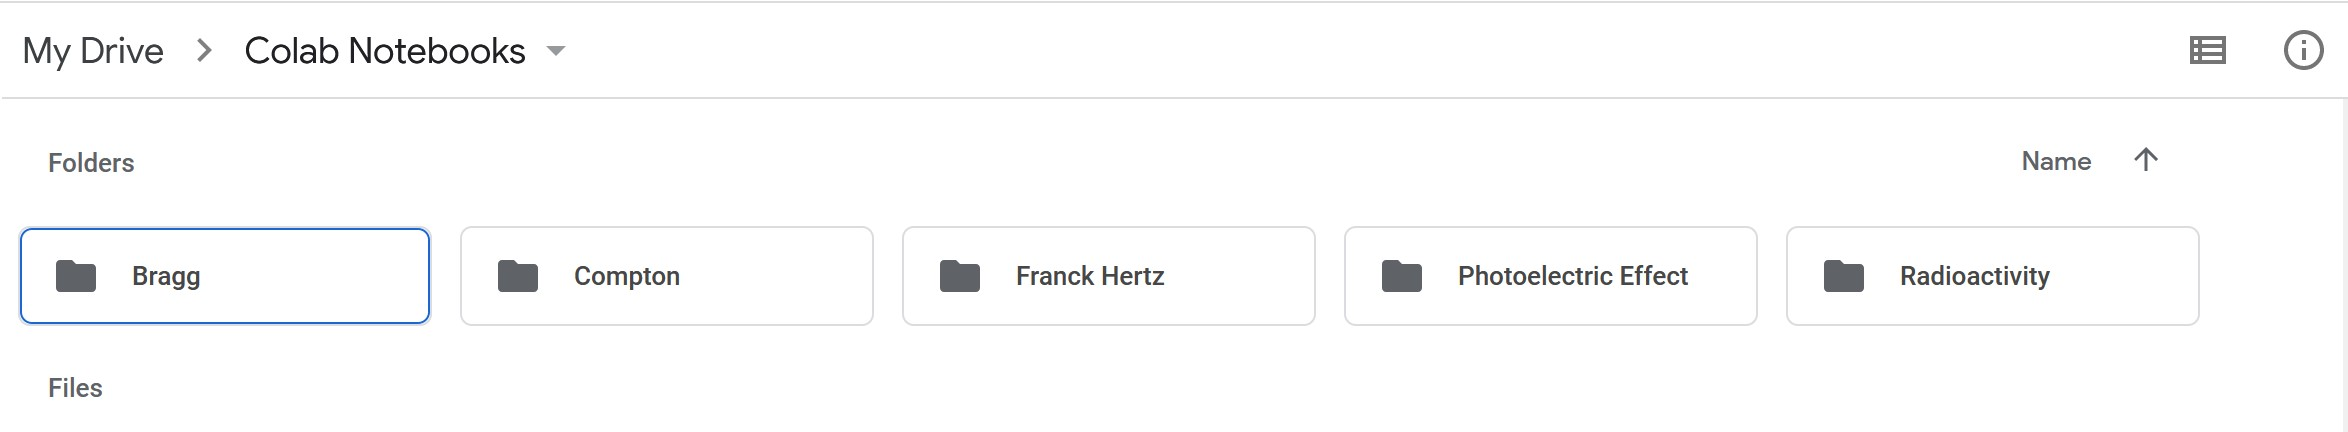

This allows for easier import into Google Colab. 

Every time you open your Colab notebook, you will have to mount your Google Drive, but this is relatively straightforward using the code below.  Although you can load the files manually, doing it this way (through Drive) saves you the hassle of finding your data on your local machine and importing it by hand every time you open the notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


These commands will mount your Google Drive on the virtual Google Colab machine and allow you to import files. Once the drive is mounted, you can use various Numpy commands to read in files and store the data in them as Numpy arrays. 

For example, you can use np.genfromtxt which will create an array from a .txt file. Here's an example from the Compton Effect lab.

In [ ]:
# Depending on your Google Drive file structure you may need to change the filepath variable
filepath= '/content/drive/MyDrive/Colab Notebooks/Compton/' # defining a variable as the main part of the path

norod_25deg = np.genfromtxt(filepath+'th25 deg no rod.txt',dtype=float,delimiter=',',skip_header=1) 
withrod_25deg = np.genfromtxt(filepath+'th25 deg with rod.txt',dtype=float,delimiter=',',skip_header=1)

The structure of your Google Drive will determine what file path you need to input. You can also just use the full file path in genfromtxt instead of defining a filepath variable, as below.

In [ ]:
norod_25deg = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/Compton/th25 deg no rod.txt', dtype=float, delimiter=',', skip_header=1)

The Numpy function genfromtxt (used above) is very useful and flexible for loading data files.   You will use it extensively in this course.  

There are a few options that should be specified when loading a file using this function, such as:

`dtype` is used to specify what the data type is.

`delimiter` is used to tell Python what the file uses to separate different columns.  Often it is a comma (as in .csv files), but sometimes it will be a space or a tab (which you would denote by ' ' or '\t', respectively, in this function).

`skip_header` allows you to skip a specified number of rows at the beginning of a file.  This is useful if you have information in the file header which is not data (such as column labels, or other information that is automatically included in your datafile)

Now let's practice with the testdata.csv that is included. This data looks a lot like the alpha counts from the Radioactivity lab. First we'll need to import it. Your filepath will vary depending on where the test file is in your Google Drive. 

If you open up the testdata.csv with Notepad or Excel you will also notice there are 22 rows of useless header information and 1 empty row at the bottom of the sheet (which we can call the footer). So, we will use skip_header and skip_footer to have Python ignore these rows. 

In [ ]:
radon = np.genfromtxt('/content/drive/MyDrive/testdata.csv', dtype=float, delimiter=',', skip_header=22, skip_footer=1)
print(radon)

[[0.000e+00       nan 5.500e+01 ...       nan       nan       nan]
 [1.000e+00       nan 5.600e+01 ...       nan       nan       nan]
 [2.000e+00       nan 5.700e+01 ...       nan       nan       nan]
 ...
 [1.020e+03       nan 6.600e+01 ...       nan       nan       nan]
 [1.021e+03       nan 6.900e+01 ...       nan       nan       nan]
 [1.022e+03       nan 7.200e+01 ...       nan       nan       nan]]




---


**Exercise:** Create a new array with the two columns of data by excluding the nan columns.

---


# 4. Plotting and Data Visualization
Data visualization is extremely important in science. Python makes it easy to make quick plots to see what your data actually look like. This will be really useful for making sure your experimental set-up is working like you think it is or checking to see if you're getting useful results.  Also, you will need to be able to make nice plots for your lab reports.



Most Python plotting is done using `matplotlib.pyplot` .   This package allows you to make plots in a very similar way as you would in Matlab. Let's start with a simple plot and see how it works.

pyplot was imported imported at the beginning of this notebook, and was called `plt`.  All the plotting functions will need a `plt.` in front since they are from this package. 

Text(0.5, 1.0, 'Not Fun Title')

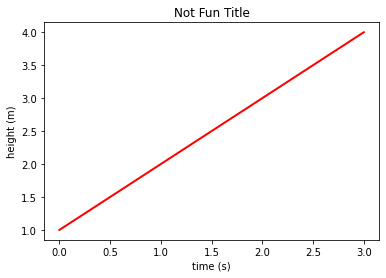

In [ ]:
data = [1, 2, 3, 4]
plt.plot(data, 'r-', linewidth=2.0) # r- specifies that we want a red line as the formatting 
plt.xlabel('time (s)') # generates an x-label for the plot
plt.ylabel('height (m)') # generates a y-label for the plot
plt.title('Not Fun Title') # makes a title

Notice how x-values were not specified, so values of x = [0,1,2,3] were automatically generated. However, you can also specify those values and let's also save this graph to our files on the left side-bar. 
**Remember** to download your graphs as .jpgs or .pngs when you're done making them, if you want to save them for your lab report.   You can either use `savefig` (as below), or you can right-click to download.

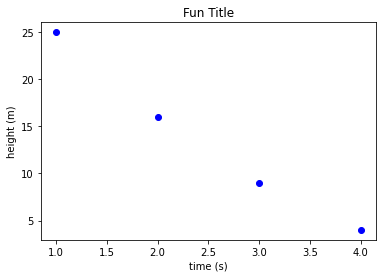

In [ ]:
x = [1, 2, 3, 4] # specific x values
y = [25, 16, 9, 4]
plt.plot(x,y, 'bo') # bo specifies that we want blue dots
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.title('Fun Title')
plt.savefig('fundata.png') # saves the graph to your Google Colab files

Plots can also easily be saved by right-clicking on a plot and saving the graph as an image. Remember to save your graphs to a flash-drive or the Cloud (such as your Google Drive) so you can access them later.

We can also easily plot two lines on the same graph. Let's use Numpy to make a range of evenly spaced values from 0 to 10 seconds in 0.5 second steps. We also can change the y-scale to a log scale which is useful for visualizing some  features in data sets in this class.

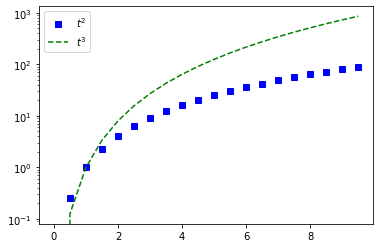

In [ ]:
t = np.arange(0., 10., 0.5) # evenly sampled time at 200ms intervals

plt.plot(t, t**2, 'bs', label='$t^2$') # plotting t vs. t^2 using a label for a legend
plt.plot(t, t**3, 'g--', label='$t^3$') # plotting t vs. t^3 using a label for a legend

# The use of $ $ around an expression tells Python that it is Tex script

plt.yscale('log') #change the y scale to log
plt.legend()



---


**Exercise:** Create a plot of $x$ vs. $x^2$ and $x$ vs. $x^4$ on the same graph from 0 to 5 with a title, proper axis labels, with a legend, and with different color dots. Then save the plot, and upload it to your PH315 Google Drive folder.


---



Now here is a more complicated example of plotting and sub-plotting with error bars which will hopefully be useful when you are making your own plots (adapted from [matplotlib's documentation](https://matplotlib.org/3.3.3/contents.html)).  The use of errobars on plots is very important in this class. 

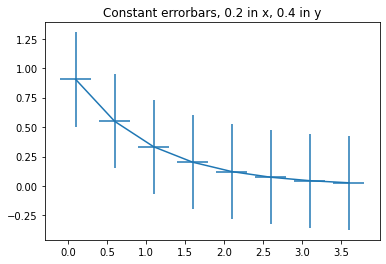

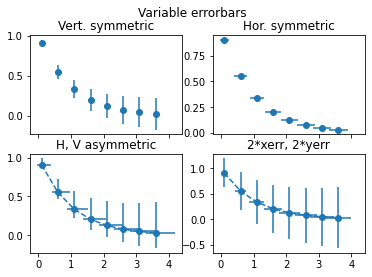

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# Example variable error bar values
yerr = 0.01 + 0.1*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4) # this is creating constant error bars
plt.title("Constant errorbars, 0.2 in x, 0.4 in y")

# Now creating a 2x2 grid of subplots below the above plot
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True) # you can insert a figsize=(x,y) to make your plots bigger or smaller here
# example: fig, axs = plt.subplots(2,1, figsize=(5,5))

# This line of code can be used to
# format the subplots by adding or removing around the subplots. Play with it if you'd like!
# plt.subplots_adjust(left=None, right=None, bottom=None, top=1, wspace=None, hspace=0.8) 

ax = axs[0,0] # choose the i=1,j=1 subplot
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

ax = axs[0,1] # choose the i=1,j=2 subplot
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0] # choose the i=2,j=1 subplot
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1] # choose the i=2,j=2 subplot
ax.errorbar(x, y, 2*xerr, 2*yerr, fmt='--o')
ax.set_title('2*xerr, 2*yerr')

fig.suptitle('Variable errorbars') # creating a title for the subplots

plt.show()



---


**Exercise:** Using your previous code, create constant error bars of xerror = 0.5 and yerror = 1 for $x$ vs. $x^2$ 

and xerror = 1 yerror = 2 for $x$ vs. $x^4$ in two subplots.


---



# 5. Curve Fitting

We will commonly need to fit functions/curves to data in this class. Two common curve fitting methods in Python are Numpy's polyfit (np.polyfit) and SciPy optimize's curve_fit (scipy.optimize.curve_fit).  Polyfit only works for polynomials, while SciPy optimize lets you define arbitrary fitting functions (e.g. Gaussian, exponential, or whatever)

Here is a simple example of Numpy's polyfit on a set of data.  Notice how the parameters extracted from fitting the line (the slope and intercept) have uncertainties associated with them.  This is true for *all fits* and is extremely important in this class.  We will talk about it in detail in the second week. You will need to know how to access the uncertainties, as below, so you can report them in your lab reports.

[0.09929407 0.32593933]
[0.27942503 0.18965764]


The slope of the line is 0.099 +/- 0.279 and the y-intercept is 0.326 +/- 0.190


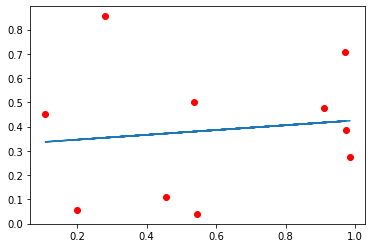

In [ ]:
N = 10

x = np.random.random(N)
y = np.random.random(N)

# Use Polyfit to create a matrix of fitted parameters, z,
# and a covariance matrix which we can square root to get the standard deviation/error of the fit
z, cov = np.polyfit(x, y, 1, cov=True) # The 1 designates a degree-one polynomial, a line.  Cov is the covariance matrix, which will be used to get the uncertainties.
stdev = np.sqrt(np.diag(cov)) # the standard deviations (uncertainties) is the sqrt of the covariance diagonals

# Now we can print out the fitting parameters of the line (m and b) and the error of each parameter
print(z)
print(stdev)

print("\n") # putting \n in a print string will tell Python to make a new line
 
# Using print to display the fitting parameters and their errors meaningfully
print("The slope of the line is %1.3f +/- %1.3f and the y-intercept is %1.3f +/- %1.3f" % (z[0], stdev[0], z[1], stdev[1]))

plt.plot(x,y,'ro') # plot the x and y data
trend = np.poly1d(z)
plt.plot(x,trend(x)); # plot the trend line




---


**Exercise:** Create an array of linear-ish data and plot it using polyfit. Also, feel free to try plotting quadratic data using polyfit.


---



Polyfit works great for lines and low-degree polynomials. However, for more compliated fitting, we'll utilize scipy.optimize. For example, if we want to fit a Gaussian to some data. 

First we must define the function we wish to fit. Let's try to fit an exponential: $y = ae^{bx}$

In [ ]:
from scipy.optimize import curve_fit # import the curve fit module from scipy

# Now define our exponential
def exponential(x, a, b):
  return a*np.exp(b*x)
  

Now we create a dummy dataset to fit with the function.

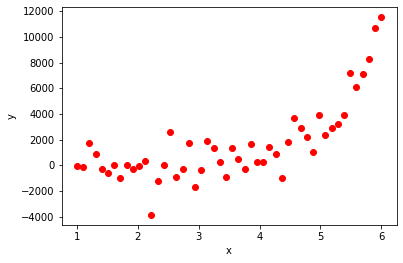

In [ ]:
x = np.linspace(start=1, stop=6, num=50)
# To create our y data, we have to use x and specify a and b
# In this case, a=0.5, b=1.5
y = exponential(x, 1.5, 1.5)

# I also am going to create noise (I could do this manually but this is faster)
# This will make the data set imperfect
noise = 1000*np.random.normal(size=y.size)
y = y + noise

# Now plot the data
plt.plot(x, y, 'ro')

plt.xlabel('x')
plt.ylabel('y');

Now we fit the data with a exponential using curve_fit.

In [ ]:
pars, cov = curve_fit(f=exponential, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

In this case, we specified that we wanted to try to fit our previously defined function (exponential) to the data. 

**p0** specifies the intial guesses for the a and b parameters (intial guess being a=0 and b=0 in this case). 

**bounds** specifies what the parameters can be. 

**pars** is the array of parameters generated by curve_fit ([a, b] from this fit).

**cov** is the estimated covariance of pars generated by curve_fit which is used to find the standard deiviation.

Now we can find the standard deviation of the fit parameters.

In [ ]:
# Standard deviation
stdev = np.sqrt(np.diag(cov)) # stdev is the sqrt(cov)

# Residuals can be calculated easily as well.
res = y - exponential(x, *pars) # *pars unrolls/unpacks the [a, b] array
# into a, b. So exponential(x, *pars) is equivalent to exponential(x, a, b)

print(*pars)
print(*stdev)

# Using print to display the results meaningfully
print("\n a is %1.3f +/- %1.3f, b is %1.3f +/- %1.3f" % (pars[0], stdev[0], pars[1], stdev[1]))

2.084272493217437 1.436989642116566
1.7445440016696714 0.1465599235787979

 a is 2.084 +/- 1.745, b is 1.437 +/- 0.147


Note: The values of a and b are close to the initial input values (but are definitely not always right on). However, they are generally inside a standard deviation of the initial values.

Now we can plot the fit over the data, like we've done before. It did a pretty good job!

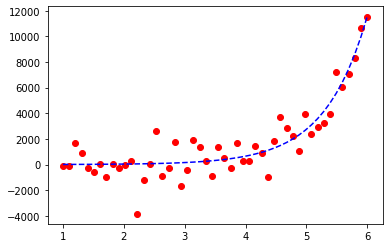

In [ ]:
plt.plot(x, y, 'ro')
plt.plot(x, exponential(x,*pars), 'b--');



---


**Exercise:** Play with the a,b parameters of the exponential, the randomness of the data, or the size of the data set. Are your fitting parameters always within a standard deviation of the initial parameters you set?


---





---


**Extra Exercise:** If you have time, try defining a different function (like x, x^2, x^4, sinx, etc.), creating noisy data to fit, fitting the data, and plotting it.


---



A common thing is fit in this course is a Gaussian function $y=ae^\frac{-(x-b)^2}{2c^2}$. Let's follow our exact same steps as before to fit one from a data set.

5.025400818043974 -1.039634636695472 2.987198578206616
0.19708218692598764 0.13524312452566034 0.13535240859180328


 a is 5.025 +/- 0.197 
 b is -1.040 +/- 0.135 
 c is 2.987 +/- 0.135


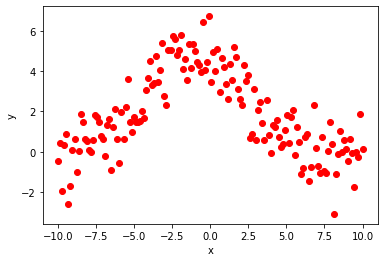

In [ ]:
# Now define our gaussian
def gaussian(x, a, b, c):
  return a*np.exp(-np.power(x - b, 2)/(2*np.power(c,2)))

x = np.linspace(start=-10, stop=10, num=150)
# To create our y data, we have to use x and specify a, b, c
y = gaussian(x, 5, -1, 3)

# I also am going to create noise (I could do this manually but this is faster)
# This will make the data set "imperfect"
noise = 1*np.random.normal(size=y.size)
y = y + noise

# Now plot the data
plt.plot(x, y, 'ro')

plt.xlabel('x')
plt.ylabel('y')

pars, cov = curve_fit(f=gaussian, xdata=x, ydata=y, p0=[1, 1, 1], bounds=(-np.inf, np.inf))

# Standard deviation
stdev = np.sqrt(np.diag(cov)) # stdev is the sqrt(cov)

# Residuals
res = y - gaussian(x, *pars) # the residuals can be calculated easily as well.. *pars unrolls/unpacks the [a, b, c] array

print(*pars)
print(*stdev)
print("\n")

# Using print to display the fitting parameters and their error meaningfully
print(" a is %1.3f +/- %1.3f \n b is %1.3f +/- %1.3f \n c is %1.3f +/- %1.3f" 
     % (pars[0], stdev[0], pars[1], stdev[1], pars[2], stdev[2]))

Notice, this time we can't use p0=[0, 0, 0] as we will get a divide by zero answer, so we must try to guess a little about what the parameters would be. You could look at the equation and use it to guess more closely what you think the parameters would be but I just input p0=[1, 1, 1] without thinking about the equation of a gaussian.

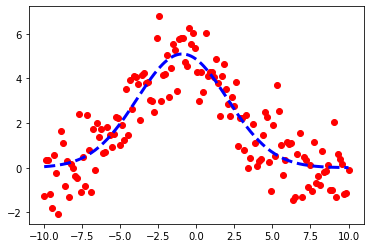

In [ ]:
plt.plot(x, y, 'ro')
plt.plot(x, gaussian(x,*pars), 'b--', linewidth=3.0);